In [1]:
pip install pandas numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [14]:
# Cargar el archivo CSV
data = pd.read_csv('heart_cleveland_upload.csv')

# Exploración de los datos
print(data.head())
print(data.info())
print(data.describe())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       29

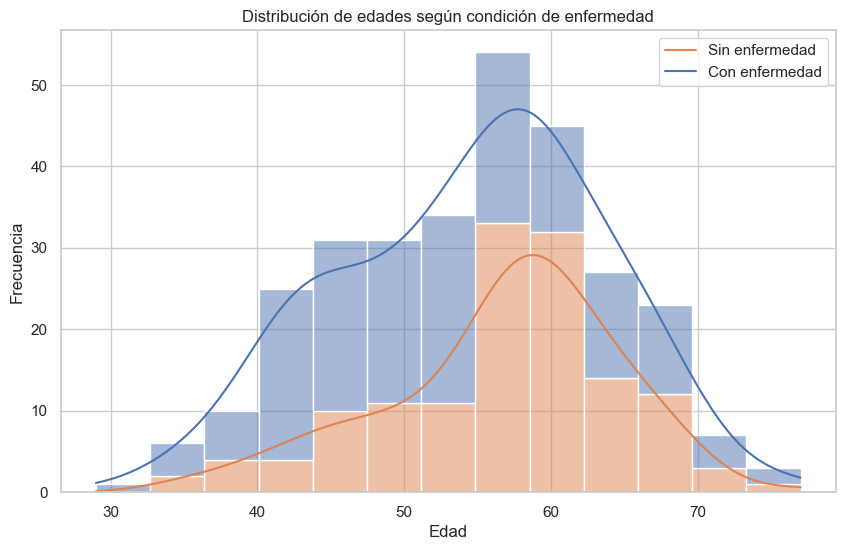

In [18]:
# Importar librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de los gráficos
sns.set(style="whitegrid")

# 1. Histograma de la distribución de edades según condición
plt.figure(figsize=(10, 6))
sns.histplot(data, x='age', hue='condition', multiple='stack', kde=True)
plt.title('Distribución de edades según condición de enfermedad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(['Sin enfermedad', 'Con enfermedad'])
plt.show()


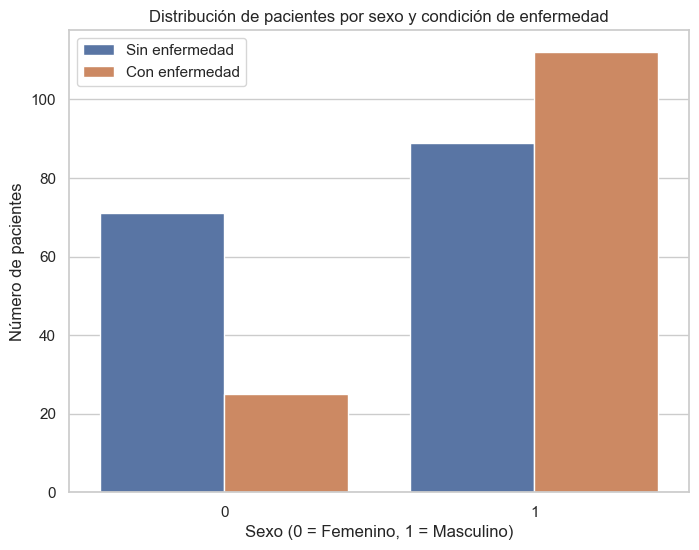

In [20]:
# 2. Gráfico de barras para ver la distribución de pacientes según sexo y condición
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='sex', hue='condition')
plt.title('Distribución de pacientes por sexo y condición de enfermedad')
plt.xlabel('Sexo (0 = Femenino, 1 = Masculino)')
plt.ylabel('Número de pacientes')
plt.legend(['Sin enfermedad', 'Con enfermedad'])
plt.show()

In [16]:
# Separar las características (X) y la variable objetivo (y)
X = data.drop(columns='condition')
y = data['condition']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Precisión del modelo: {accuracy}")
print("Matriz de confusión:")
print(conf_matrix)
print("Reporte de clasificación:")
print(class_report)


Precisión del modelo: 0.7888888888888889
Matriz de confusión:
[[37 11]
 [ 8 34]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80        48
           1       0.76      0.81      0.78        42

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90

